In [1]:
setwd('/import/oa/rawdata//scrna')
scRNA = readRDS('./scRNA.anno.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [3]:
scRNA

An object of class Seurat 
41851 features across 6082 samples within 1 assay 
Active assay: RNA (41851 features, 2000 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [4]:
unique(scRNA$seurat_clusters)

[1] 3  4  5  12 9  8  7  1  6  2  0 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12

In [24]:
Idents(scRNA) = 'seurat_clusters'

In [25]:
scRNA$group = scRNA$orig.ident

In [26]:
table(scRNA$orig.ident)


Day0 Day1 Day3 
2009 2504 1569 


Day0 Day1 Day3 
2009 2504 1569 


         0          1          2          3          4          5          6 
0.19796120 0.18710950 0.16014469 0.15882933 0.09174614 0.05590266 0.04406445 
         7          8          9         12 
0.03370602 0.03239066 0.02597830 0.01216705 

    
     Day0 Day1 Day3
  0     0 1027  177
  1     3  440  695
  2     0  848  126
  3   943   16    7
  4   548    5    5
  5   228   51   61
  6     1    1  266
  7   132   43   30
  8    59   42   96
  9    28   25  105
  12   67    6    1

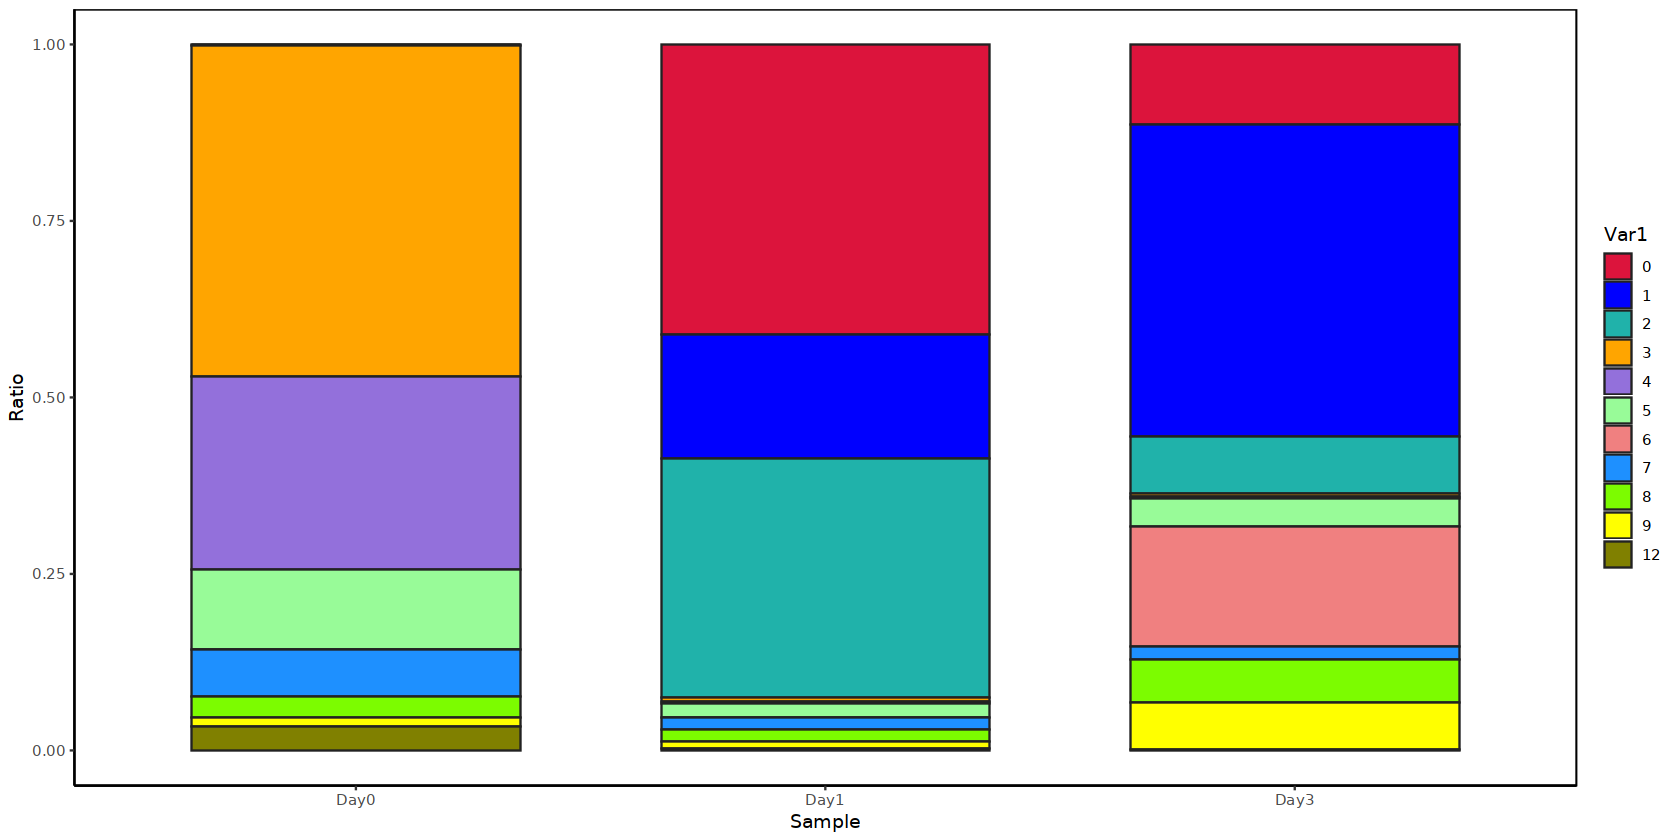

In [27]:
Idents(scRNA) ='seurat_clusters'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('Day0','Day1','Day3'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

In [28]:
p1 = ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [29]:
options(repr.plot.width = 14)

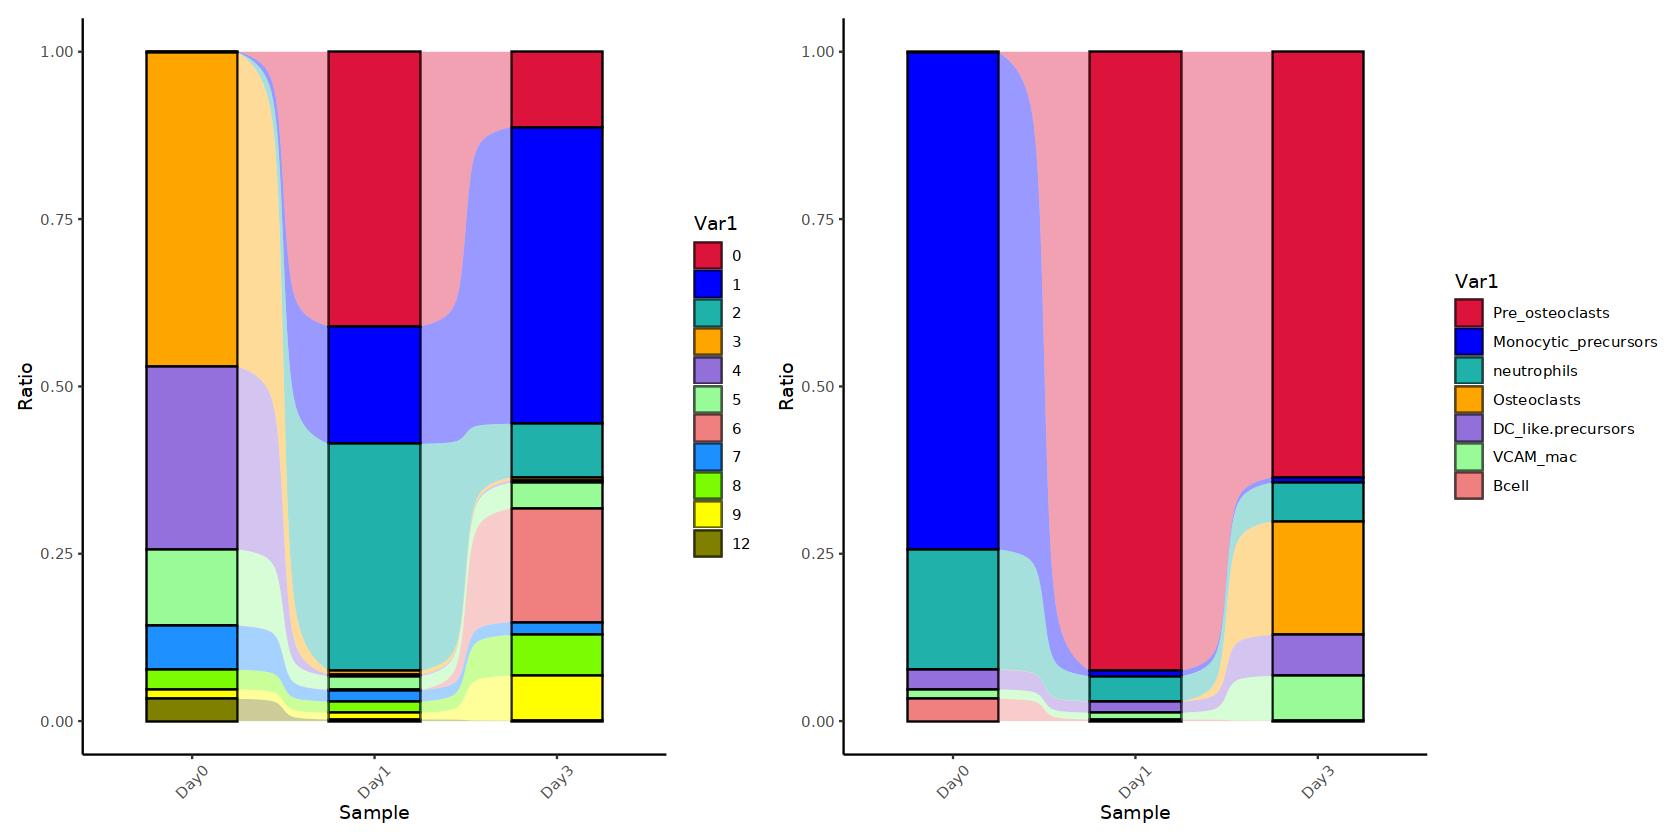

In [35]:
p1 + p2

In [36]:
ggsave('./cellratio.pdf',height = 6,width = 15)

In [33]:
getwd()

[1] "/import/oa/rawdata/scrna"